# Training an Asset allocation environment

In this section we will train a custom gym environment for the asset allocation problem.  

**Problem Statement**  

We want to train an agent which can decide for us how to allocate our financial resources between different asset.  
In our dataset we will have the **open**, **close**, **high**, **low** prices and **volume** for a given day. This will be the state (i.e. observations) the agent will see. On the basis of this observation the agent should choose the best allocation in order to obtain the higher profit.

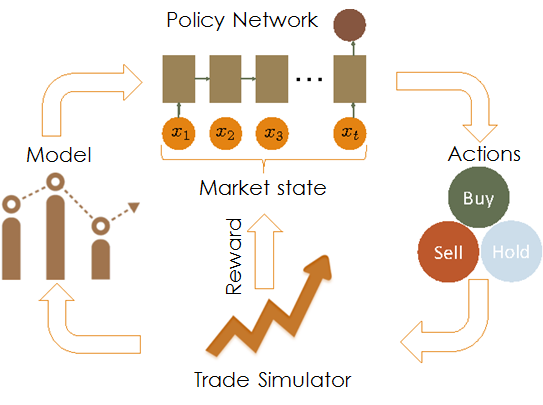

## Environment Description

The environment manage the allocation of three different assets:  

* **ETF on Treasury Bond 7-10 years**
* **ETF on FTSEMIB**
* **Cash**

For every observation we can choose how to allocate our resources. The asset allocation is defined in terms of **percentage allocated** to every asset.  

The step function will take as action a numpy array of shape (2,) of type float from [0,1] which represent the percentage of allocation for each asset. The returned observation will be the next open, high, low, close, volume of both the assets.


**Example:**  

Let's suppose our step is defined as follow:  

* env.step(np.array([0.6, 0.4]))  

This mean we are allocating **60%** of our resources in the first asset and **40%** in the second asset.  

If the sum of the allocation is less than 1 the remaining percentage will be allocated as cash which can be considered a third asset that does not change its value over time.  

When we change our allocation we also have to keep in mind that we are paying some transaction fees.

Our objective is to maximize the value of our portfolio.

## Train The Environment  

We can train our environment using the baselines algorithms. In particular we will train it using the Proximal Policy Optimization Algorithm (PPO) with an LSTM since we are dealing with sequential data.

In [ ]:
%set_env OPENAI_LOGDIR=./log_asset_allocation_fees
!python -m baselines.run --network=lstm --alg=ppo2 --env=asset_allocation-v0 --num_timesteps=1e8 --num_env=8 --nminibatches=4 --log_interval=1 --save_path=model_asset_allocation_fees

env: OPENAI_LOGDIR=./log_asset_allocation_fees_ddpg
Logging to ./log_asset_allocation_fees_ddpg
Logging to ./log_asset_allocation_fees_ddpg
env_type: asset_allocation
2019-08-28 15:11:02.499054: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
RUNNING ASSET ALLOCATION ENVIRONMENT
RUNNING ASSET ALLOCATION ENVIRONMENT
RUNNING ASSET ALLOCATION ENVIRONMENT
RUNNING ASSET ALLOCATION ENVIRONMENT
RUNNING ASSET ALLOCATION ENVIRONMENT
RUNNING ASSET ALLOCATION ENVIRONMENT
RUNNING ASSET ALLOCATION ENVIRONMENT
RUNNING ASSET ALLOCATION ENVIRONMENT
RUNNING ASSET ALLOCATION ENVIRONMENT
RUNNING ASSET ALLOCATION ENVIRONMENT
RUNNING ASSET ALLOCATION ENVIRONMENT
RUNNING ASSET ALLOCATION ENVIRONMENT
RUNNING ASSET ALLOCATION ENVIRONMENT
RUNNING ASSET ALLOCATION ENVIRONMENT
RUNNING ASSET ALLOCATION ENVIRONMENT
RUNNING ASSET ALLOCATION ENVIRONMENT
Training ppo2 on asset_allocation:asset_allocation-v0 with argument

### Visualize Training

Watching the reward curve we can see that it is increasing over time.  

We can also see a typical behaviour of reinforcement learning algorithm: After an **initial raising** in the performance the algorithm **plateau** and seems it is no more learning. However after some time the mean episode reward start rising againg reaching a new stable level.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

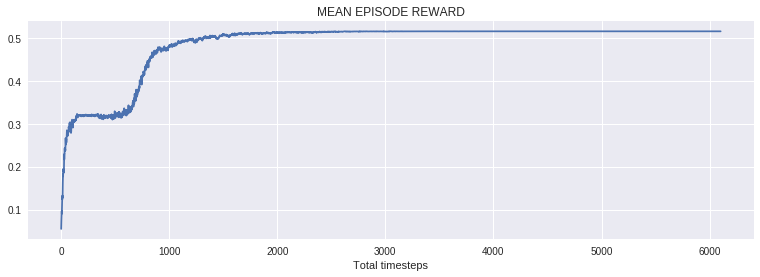

In [3]:
plt.style.use('seaborn')
df = pd.read_csv('logs/progress.csv')

plt.figure(figsize=(13,4))
plt.plot(df['eprewmean'])
plt.xlabel('Total timesteps')
plt.title('MEAN EPISODE REWARD')

plt.show()

In [14]:
%set_env LOG_PATH=/home/agsuser/Desktop/log_test_performance_2019_08_01.csv
!python -m baselines.run --network=lstm --alg=ppo2 --env=asset_allocation-v0 --num_timesteps=0 --log_interval=1 --num_env=1 --nminibatches=1 --load_path=model_asset_allocation_fees_2019_08_01 --play

env: LOG_PATH=/home/agsuser/Desktop/log_test_performance_2019_08_01.csv
Logging to /tmp/openai-2019-08-02-09-26-16-755317
Logging to /tmp/openai-2019-08-02-09-26-16-962990
env_type: asset_allocation
2019-08-02 09:26:18.746446: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
RUNNING ASSET ALLOCATION ENVIRONMENT
Training ppo2 on asset_allocation:asset_allocation-v0 with arguments 
{'log_interval': 1, 'nminibatches': 1, 'load_path': 'model_asset_allocation_fees_2019_08_01', 'network': 'lstm'}
Running trained model
RUNNING ASSET ALLOCATION ENVIRONMENT
^C
Traceback (most recent call last):
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/agsuser/Desktop/virtualenv-experiment/baselines/baselines/run.py", line 240, in <module>
    main(sys.argv)
  F

### Visualizing Portfolio Management

Text(0.5, 1.0, 'PORTFOLIO VALUE')

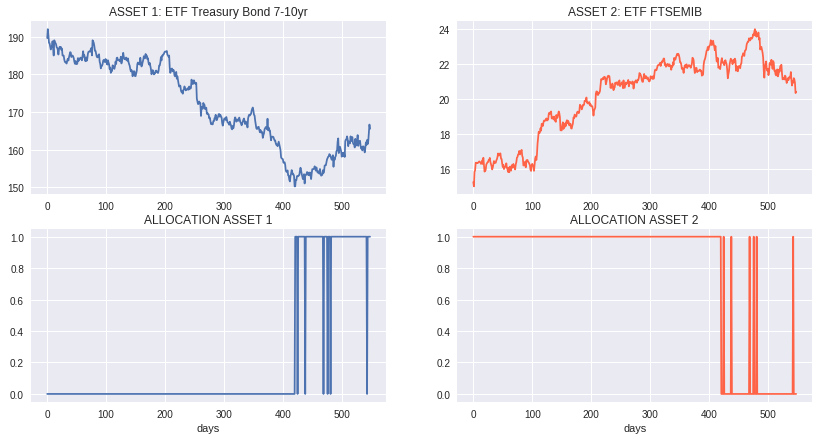

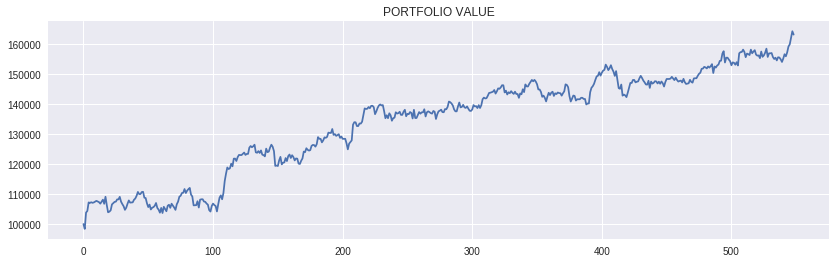

In [6]:
plt.style.use('seaborn')
df = pd.read_csv('logs/log_train_performance_asset_allocation.csv')

plt.figure(figsize = (14,7))
plt.subplot(221)
plt.plot(df['open'])
plt.title('ASSET 1: ETF Treasury Bond 7-10yr')
plt.subplot(222)
plt.plot(df['open.1'], color = 'tomato')
plt.title('ASSET 2: ETF FTSEMIB')

plt.subplot(223)
plt.plot(df['allocation_1'])
plt.title('ALLOCATION ASSET 1')
plt.xlabel('days')
plt.subplot(224)
plt.plot(df['allocation_2'], color = 'tomato')
plt.title('ALLOCATION ASSET 2')
plt.xlabel('days')


plt.figure(figsize = (14,4))
plt.plot(df['value'])
plt.title('PORTFOLIO VALUE')

## Test Performance

Text(0.5, 1.0, 'PORTFOLIO VALUE')

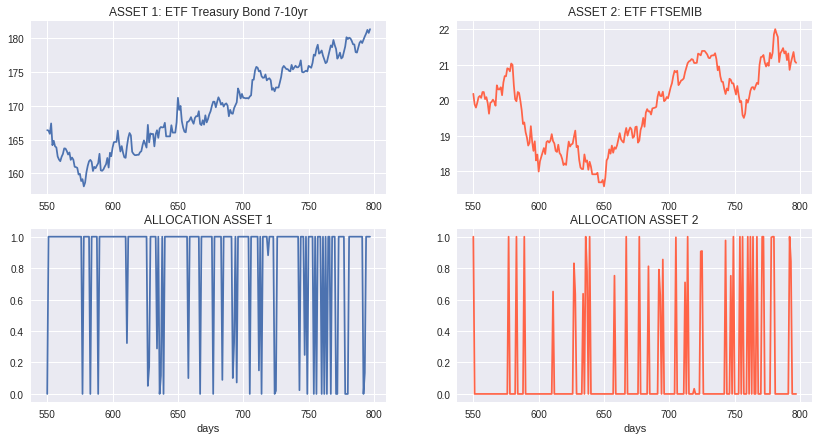

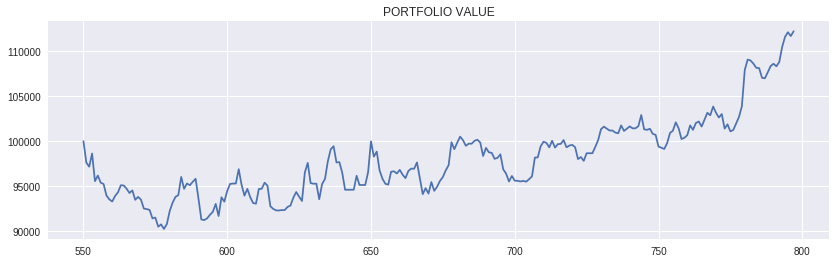

In [9]:
plt.style.use('seaborn')
df = pd.read_csv('logs/log_test_performance_asset_allocation.csv')
df = df.iloc[550:]

df['value'] = df['value'] - (df['value'].iloc[0] - 100000)

plt.figure(figsize = (14,7))
plt.subplot(221)
plt.plot(df['open'])
plt.title('ASSET 1: ETF Treasury Bond 7-10yr')
plt.subplot(222)
plt.plot(df['open.1'], color = 'tomato')
plt.title('ASSET 2: ETF FTSEMIB')

plt.subplot(223)
plt.plot(df['allocation_1'])
plt.title('ALLOCATION ASSET 1')
plt.xlabel('days')
plt.subplot(224)
plt.plot(df['allocation_2'], color = 'tomato')
plt.title('ALLOCATION ASSET 2')
plt.xlabel('days')


plt.figure(figsize = (14,4))
plt.plot(df['value'])
plt.title('PORTFOLIO VALUE')

### Discussion

The performance on the test set show a different behaviour with respect to the train set suggesting some sort of overfitting of the train data. While in the train set the asset allocation is quite stable we can see here a lot of portfolio movement for very short periods of time. This results in a lot of transaction costs reducing the final portfolio value. In order to avoid overfitting different solutions may be applied such as:  

* Increasing the train data  
* Changing the network structure  
* Tuning the algorithm hyperparameters  
* Using different features

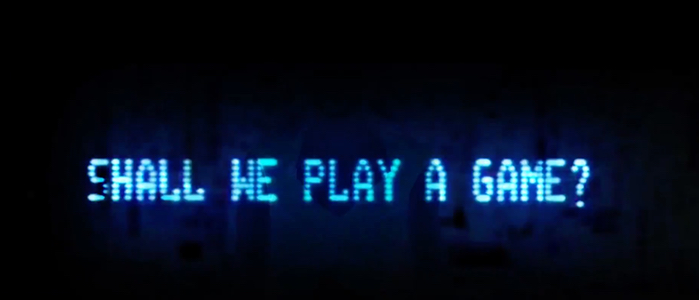